In [32]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Suppress warnings
warnings.filterwarnings("ignore")

In [34]:
# Using pandas dataframe
df = pd.read_csv("train.csv")

In [35]:
# Correlation between Survived and Sex
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
print(df['Survived'].corr(df['Sex']))
#print(df['Sex'].str.get_dummies().corrwith(df['Survived']/df['Survived'].max()))

# We shouldn't keep this feature

-0.5433513806577547


In [36]:
# Two visualizations to describe or show correlations - 1st One
df.corr().style.background_gradient(cmap="Greens")

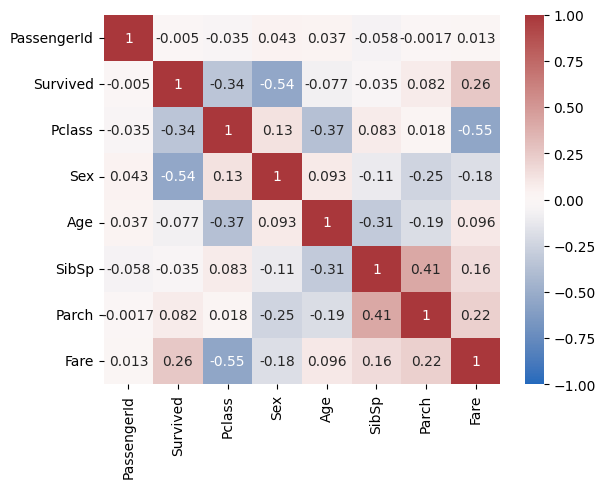

In [37]:
# Two visualizations to describe or show correlations - 2nd One
matrix = df.corr()
#print(matrix)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
#sns.regplot(x=df['Sex'], y=df['Survived'])
#sns.barplot(x=train_df['Sex'], y=train_df['Survived'])

In [38]:
# Implementing Naïve Bayes method using scikit-learn library and report the accuracy
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# Join data to analyse and process the set as one.
df_train['train'] = 1
df_test['train'] = 0
df = df_test.append(df_train, sort=False)

features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'
df = df[features + [target] + ['train']]

In [39]:
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values

train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)

In [40]:
X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
print('Accuracy is ',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
Accuracy is  0.7552447552447552
